In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from numpy import arange
from pandas import read_csv
from pandas import set_option
import seaborn as sns
from scipy import stats as st
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8
sns.set_context("poster")
sns.set_style("whitegrid")

In [3]:
# Downloaded combine csv to my desktop, therefore change directory to my pc desktop
os.chdir('C:\Users\chads\Desktop')

In [4]:
# Import and preview the raw combine data
newdf = pd.read_csv("newdf.csv")
newdf.head()

,Unnamed: 0,position,height,weight,fortyyd,twentyss,threecone,vertical,broad,bench,picktotal
0,0,RB,69.0,205,4.60,3.95,6.79,42.5,130.0,24.0,54.0
1,1,WR,72.0,198,4.42,NaN,NaN,NaN,NaN,12.0,20.0
2,2,RB,72.0,221,4.57,4.10,7.10,39.0,121.0,19.0,149.0
3,3,OLB,73.0,227,4.55,4.20,7.14,36.0,121.0,24.0,124.0
4,4,WR,68.0,180,4.43,4.07,6.64,34.0,121.0,13.0,238.0


In [5]:
# Mean and standard deviation of every drill and picktotal for each position
newdfa = newdf[['position', 'height', 'weight', 'fortyyd', 'twentyss', 'threecone', 'vertical', 'broad', 'bench', 'picktotal']]
grouped = newdfa.groupby('position')
groupedagg = grouped.agg([np.mean, np.std])
groupedagg

height                weight              fortyyd            \
               mean       std        mean        std      mean       std   
position                                                                   
C         75.430233  1.068707  304.337209   7.725604  5.214545  0.146229   
CB        71.260977  1.557581  193.099150   8.654927  4.475277  0.085593   
DE        75.886519  1.394716  269.204778  13.729245  4.810318  0.135501   
DT        75.143411  1.462493  307.468992  14.421969  5.087592  0.157114   
ILB       73.664336  1.227296  242.097902   7.503346  4.720500  0.119087   
OG        76.090909  1.226533  314.656566  13.174473  5.272316  0.154943   
OLB       74.060606  1.388478  241.284091  10.229625  4.676680  0.119412   
OT        77.748148  1.211583  316.662963  14.412707  5.238258  0.176482   
QB        75.216374  1.646733  224.239766  11.282253  4.813841  0.187232   
RB        70.870427  1.930301  214.556911  14.039696  4.534191  0.112351   
S         72.748031  1.460784  208.358268   9.482749  4.546379  0.086841   
TE        76.448087  1.349108  254.704918   9.020144  4.749302  0.134066   
WR        72.784118  2.272771  201.014493  15.675887  4.485966  0.097519   

          twentyss           threecone             vertical            \
              mean       std      mean       std       mean       std   
position                                                                
C         4.599722  0.160211  7.740909  0.283741  28.760274  2.992014   
CB        4.136136  0.148414  6.898026  0.189399  36.416139  2.740946   
DE        4.405773  0.179117  7.233472  0.202423  33.478261  3.015588   
DT        4.605193  0.187384  7.642979  0.286098  29.476852  2.895373   
ILB       4.283960  0.142591  7.112632  0.180119  33.595041  2.839685   
OG        4.726039  0.199334  7.849048  0.247217  27.990683  2.996598   
OLB       4.265659  0.148516  7.130444  0.264601  34.927632  3.200052   
OT        4.723717  0.179167  7.762982  0.278715  28.592437  2.981282   
QB        4.301014  0.169147  7.115833  0.205626  31.769231  3.558252   
RB        4.229527  0.157770  7.005102  0.188482  35.037946  3.067205   
S         4.176743  0.138449  6.992424  0.237092  36.207763  2.799735   
TE        4.341942  0.162529  7.174286  0.188137  33.550633  3.098793   
WR        4.191086  0.146686  6.900968  0.183863  35.918182  3.008743   

               broad                bench             picktotal             
                mean       std       mean       std        mean        std  
position                                                                    
C         102.236111  5.524575  26.986842  5.679186  120.139535  65.483211  
CB        122.221154  5.509343  15.117241  4.169428  103.665722  64.999007  
DE        114.916667  6.249542  24.285714  4.938684  112.778157  74.694734  
DT        105.097087  5.551558  28.200000  5.884559  108.453488  70.745336  
ILB       113.725664  7.787636  23.056000  3.992541  118.916084  67.132882  
OG        101.374194  6.248271  26.250000  5.360812  128.449495  66.755976  
OLB       117.820961  6.245581  23.087719  4.872943  114.928030  68.087051  
OT        102.755459  5.837081  25.367965  4.857859  109.896296  75.413534  
QB        110.871429  6.879061  22.000000  2.549510  105.163743  79.374741  
RB        118.678049  5.653713  20.343434  4.607788  120.105691  70.337880  
S         120.809302  5.736089  17.189189  4.430486  123.917323  68.434189  
TE        115.302632  5.242515  21.543750  4.433785  130.234973  69.294835  
WR        120.936111  5.603802  15.056818  4.359182  118.594203  71.483617

# Hypothesis Test

Will test to see that position mean weight difference is statistically significant. Chose positions cb and wr, since their mean weight only has a difference of 8 pounds. 

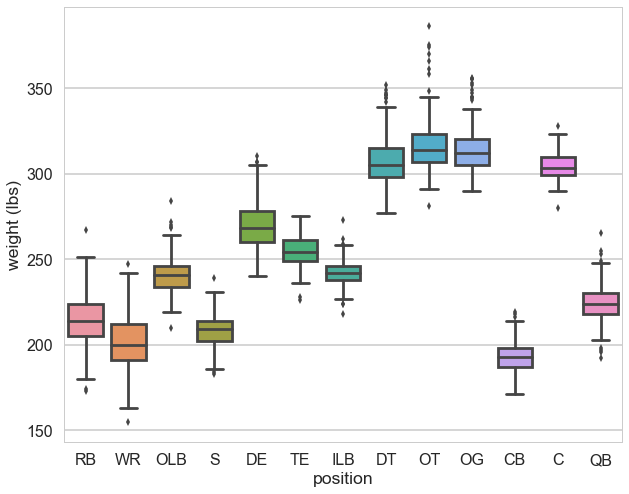

In [6]:
# checking position weight distribution
sns.boxplot(x='position', y='weight', data=newdf)
plt.xlabel('position')
_=plt.ylabel('weight (lbs)')

In [7]:
cb = newdf[newdf.position == 'CB']
wr = newdf[newdf.position == 'WR']
cbwt= cb.weight
wrwt= wr.weight

def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

Compare CB and WR weight distribution, along with the mean and standard deviation. WR has a wider distribution than CBs, which can be seen on the ECDF chart and the standard deviation results.

The number of CB is 353, along with a mean of 193.099150142 and standard deviation of 8.64265883196
The number of WR is 414, along with a mean of 201.014492754 and standard deviation of 15.6569437177


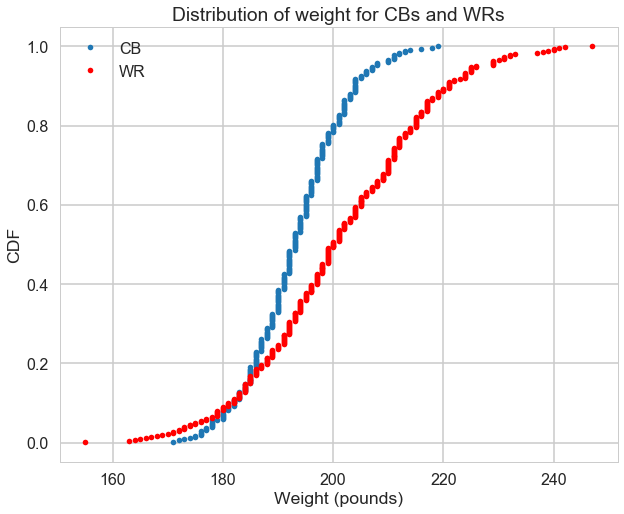

In [8]:
xcb, ycb = ecdf(cbwt)
plt.plot(xcb, ycb, label="CB", marker=".", linestyle = 'none')
xwr, ywr = ecdf(wrwt)
plt.plot(xwr, ywr, label="WR", marker=".", linestyle = 'none', markerfacecolor='red')
plt.legend()
plt.xlabel('Weight (pounds)')
plt.ylabel('CDF')
plt.title('Distribution of weight for CBs and WRs')
CBcount= len(cbwt)
WRcount= len(wrwt)
mu_cb = np.mean(cbwt)
mu_wr = np.mean(wrwt)
sigma_cb = np.std(cbwt)
sigma_wr = np.std(wrwt)
print "The number of CB is {}, along with a mean of {} and standard deviation of {}".format(CBcount, mu_cb, sigma_cb)
print "The number of WR is {}, along with a mean of {} and standard deviation of {}".format(WRcount, mu_wr, sigma_wr)

Compare the 2 independent means.

H0: No difference between mu_wr and mu_cb, which is mu_wr - mu_cb = 0

Passes conditions of CLT with all observations being independent of one another and the number of observations is > 30 for both CB and WR.

Calculate point estimate and standard error in order to calculate the z-score. Decided to use z-score instead of t-score, since there are > 30 observations for both CB and WR

In [9]:
# Point Estimate
PE = round(mu_wr - mu_cb,2)

# Standard Error
SE =np.sqrt(((sigma_cb*sigma_cb)/CBcount)+((sigma_wr*sigma_wr)/WRcount) )

# Z-score:
Z= PE/SE
print "Z-score: ",Z
print "P-value: ",st.norm.sf(abs(Z))

Z-score:  8.83427223945
P-value:  5.03760067486e-19


With a p-value of < 0.05, reject H0 (No difference between mu_cb and mu_wr, which is mu_cb - mu_wr = 0). Players weight and size is different and statistically significant.

# Picktotal Hypothesis Test

Will test to see that position mean picktotal difference is statistically significant. Once again, will test between positions CB and WR.

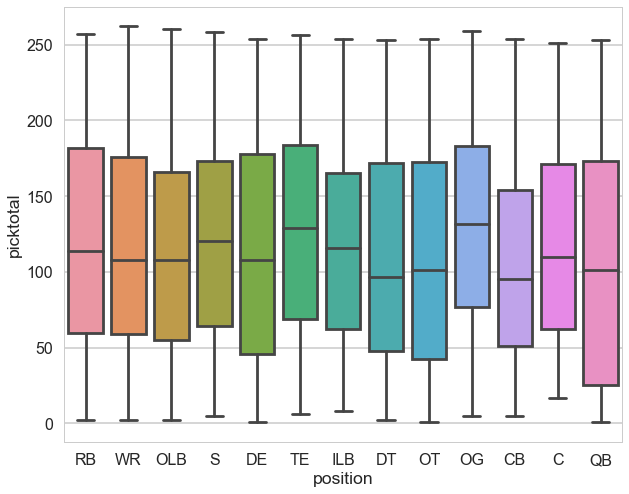

In [10]:
sns.boxplot(x='position', y='picktotal', data=newdf)
plt.xlabel('position')
_=plt.ylabel('picktotal')

The number of CB is 353, along with a mean picktotal of 103.66572238 and standard deviation of 64.906875004
The number of WR is 414, along with a mean picktotal of 118.594202899 and standard deviation of 71.3972324205


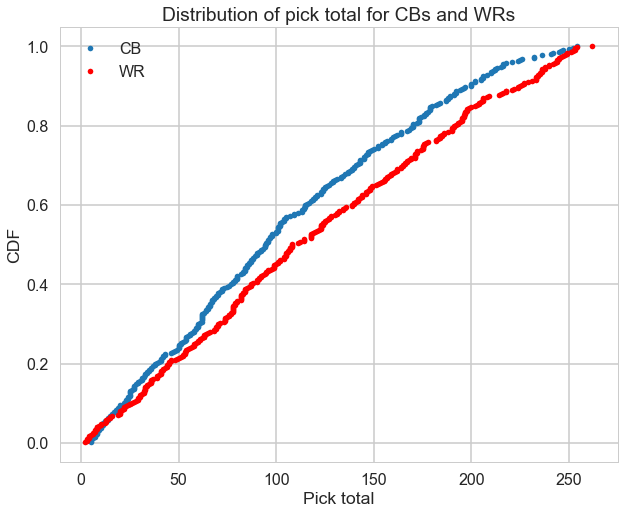

In [11]:
# Picktotal distribution for positions cb and te
cbpick= cb.picktotal
wrpick= wr.picktotal
xcb, ycb = ecdf(cbpick)
plt.plot(xcb, ycb, label="CB", marker=".", linestyle = 'none')
xwr, ywr = ecdf(wrpick)
plt.plot(xwr, ywr, label="WR", marker=".", linestyle = 'none', markerfacecolor='red')
plt.legend()
plt.xlabel('Pick total')
plt.ylabel('CDF')
plt.title('Distribution of pick total for CBs and WRs')
CBcount= len(cbpick)
TEcount= len(wrpick)
mu_cb = np.mean(cbpick)
mu_wr = np.mean(wrpick)
sigma_cb = np.std(cbpick)
sigma_wr = np.std(wrpick)
print "The number of CB is {}, along with a mean picktotal of {} and standard deviation of {}".format(CBcount, mu_cb, sigma_cb)
print "The number of WR is {}, along with a mean picktotal of {} and standard deviation of {}".format(WRcount, mu_wr, sigma_wr)

Compare the 2 independent means.

H0: No difference between mu_wr and mu_cb, which is mu_wr - mu_cb = 0

Passes conditions of CLT with all observations being independent of one another and the number of observations is > 30 for both CB and WR.

Calculate point estimate and standard error in order to calculate the z-score. Decided to use z-score instead of t-score, since there are > 30 observations for both CB and WR

In [12]:
# Point Estimate
PE = round(mu_wr - mu_cb,2)

# Standard Error
SE =np.sqrt(((sigma_cb*sigma_cb)/CBcount)+((sigma_wr*sigma_wr)/WRcount) )

# Z-score:
Z= PE/SE
print "Z-score: ",Z
print "P-value: ",st.norm.sf(abs(Z))

Z-score:  3.03197830159
P-value:  0.00121478333925


With a p-value of < 0.05, reject H0 (No difference between mu_cb and mu_wr, which is mu_wr - mu_cb = 0). Positional picktotal is different and statistically significant.

Since players appear to be significantly different, we will continue this study by analyzing the players by position

Check out next section where I try and find the best regression algorithm to predict when a player gets drafted. Will this work? Let's find out...